# 리눅스에서 파일 다운받기

#데이터준비하기
$ mkdir -p ~/aiffel/pokemon_eda/data
$ wget https://aiffelstaticprd.blob.core.windows.net/media/documents/Pokemon.csv
$ unzip pokemon.zip
$ ls
$ mv Pokemon.csv ~/aiffel/pokemon_eda/data

In [2]:
##라이브러리 가져오기
import numpy as np   ##표데이터다루기 위해
import pandas as pd  ##표데해터다루기위해
import seaborn as sns   ##그래프 시각화
import matplotlib.pyplot as plt   ##그래프시각화
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


In [3]:
##os에서 불러오기
import os
csv_path = os.getenv("HOME") +"/aiffel/pokemon_eda/data/Pokemon.csv"
original_data = pd.read_csv(csv_path)

In [4]:
##표로 시각화
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [6]:
# 일반 포켓몬 데이터셋
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [7]:
##결측치 확인  = type 2에만 결측치(데이터 없음)
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [9]:
#데이터셋의 전체컬럼
print(len(pokemon.columns)) #칼럼의 갯수
pokemon.columns #칼럼의 이름들

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [12]:
# #칼럼에 해당하는 데이터
# 컬럼을 집합으로 만든 자료 // 전체데이터보다 작은 이유는
# 중복데이터때문 = unique하지않다 = index로 쓸 수 없다
len(set(pokemon["#"]))
print(set(pokemon["#"]))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [13]:
# #칼럼이 6인 값을 출력
pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [16]:
#칼럼이 name인 데이터의 길이 = 총 데이터의 길이
len(set(pokemon["Name"]))
print(set(pokemon["Name"]))

{'Mew', 'PidgeotMega Pidgeot', 'Kangaskhan', 'Suicune', 'Tauros', 'Honedge', 'Vespiquen', 'Dialga', 'Phanpy', 'Bouffalant', 'Boldore', 'Sableye', 'Cranidos', 'Steelix', 'Slowking', 'Hitmonchan', 'Totodile', 'Gigalith', 'Kadabra', 'Virizion', 'Koffing', 'Spewpa', 'Flaaffy', 'SharpedoMega Sharpedo', 'MeowsticMale', 'Shiftry', 'Octillery', 'Frillish', 'Cinccino', 'Flareon', 'Espurr', 'Magneton', 'Plusle', 'Hitmontop', 'Camerupt', 'Lileep', 'Dwebble', 'Duskull', 'Deino', 'Dratini', 'Lunatone', 'Machop', 'Nosepass', 'Quilava', 'KeldeoOrdinary Forme', 'Feraligatr', 'Budew', 'Lilligant', 'Gloom', 'Moltres', 'Timburr', 'Deerling', 'Ferrothorn', 'Skitty', 'Klink', 'Electrode', 'Infernape', 'Nuzleaf', 'Hypno', 'Dragalge', 'Porygon2', 'Metang', 'Diglett', 'Skiddo', 'Slowpoke', 'Serperior', 'Cradily', 'Blitzle', 'Gurdurr', 'Corsola', 'Machamp', 'Heatran', 'Scrafty', 'Binacle', 'Clauncher', 'Goodra', 'LatiosMega Latios', 'Wingull', 'Shuppet', 'Seedot', 'Tympole', 'Riolu', 'Bonsly', 'Sunflora', 'Pig

In [18]:
# 6번째, 10 번째 값들 출력
pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


In [19]:
# 각 속성의 종류(type 1 칼럼, type2 칼럼의 갯수
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

In [25]:
# 차집합구하기 type2에만 있는 거
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

In [24]:
#type1타입을 type에 저장
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Rock', 'Fire', 'Dragon', 'Poison', 'Ghost', 'Bug', 'Electric', 'Ground', 'Fighting', 'Normal', 'Ice', 'Fairy', 'Dark', 'Water', 'Grass', 'Flying', 'Psychic', 'Steel']


In [30]:
# 판다스의 isna()함수
# false / true로 반환
pokemon["Type 2"].isna()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [32]:
# 판다스의 isna()함수
# false / true로 반환
pokemon["Type 2"].isna()

0      False
1      False
2      False
3      False
4       True
       ...  
795    False
796    False
797    False
798    False
799    False
Name: Type 2, Length: 800, dtype: bool

In [33]:
pokemon.head(20)
#isna() 결과와 봤을때 index4-type2와 보기

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [41]:
# 판다스의 isna()함수
# false / true로 반환
pokemon["Type 2"].isna().sum()

386

In [42]:
# head 10미만까지의 isna(T/F로 치환)한 것들의 합 = FALSE의 합 // FALSE는 1 true는 0
pokemon.head(10)["Type 2"].isna().sum()

3

## 13-7. plt의 subplot활용하여 두개의 그래프를 한번에 그리기

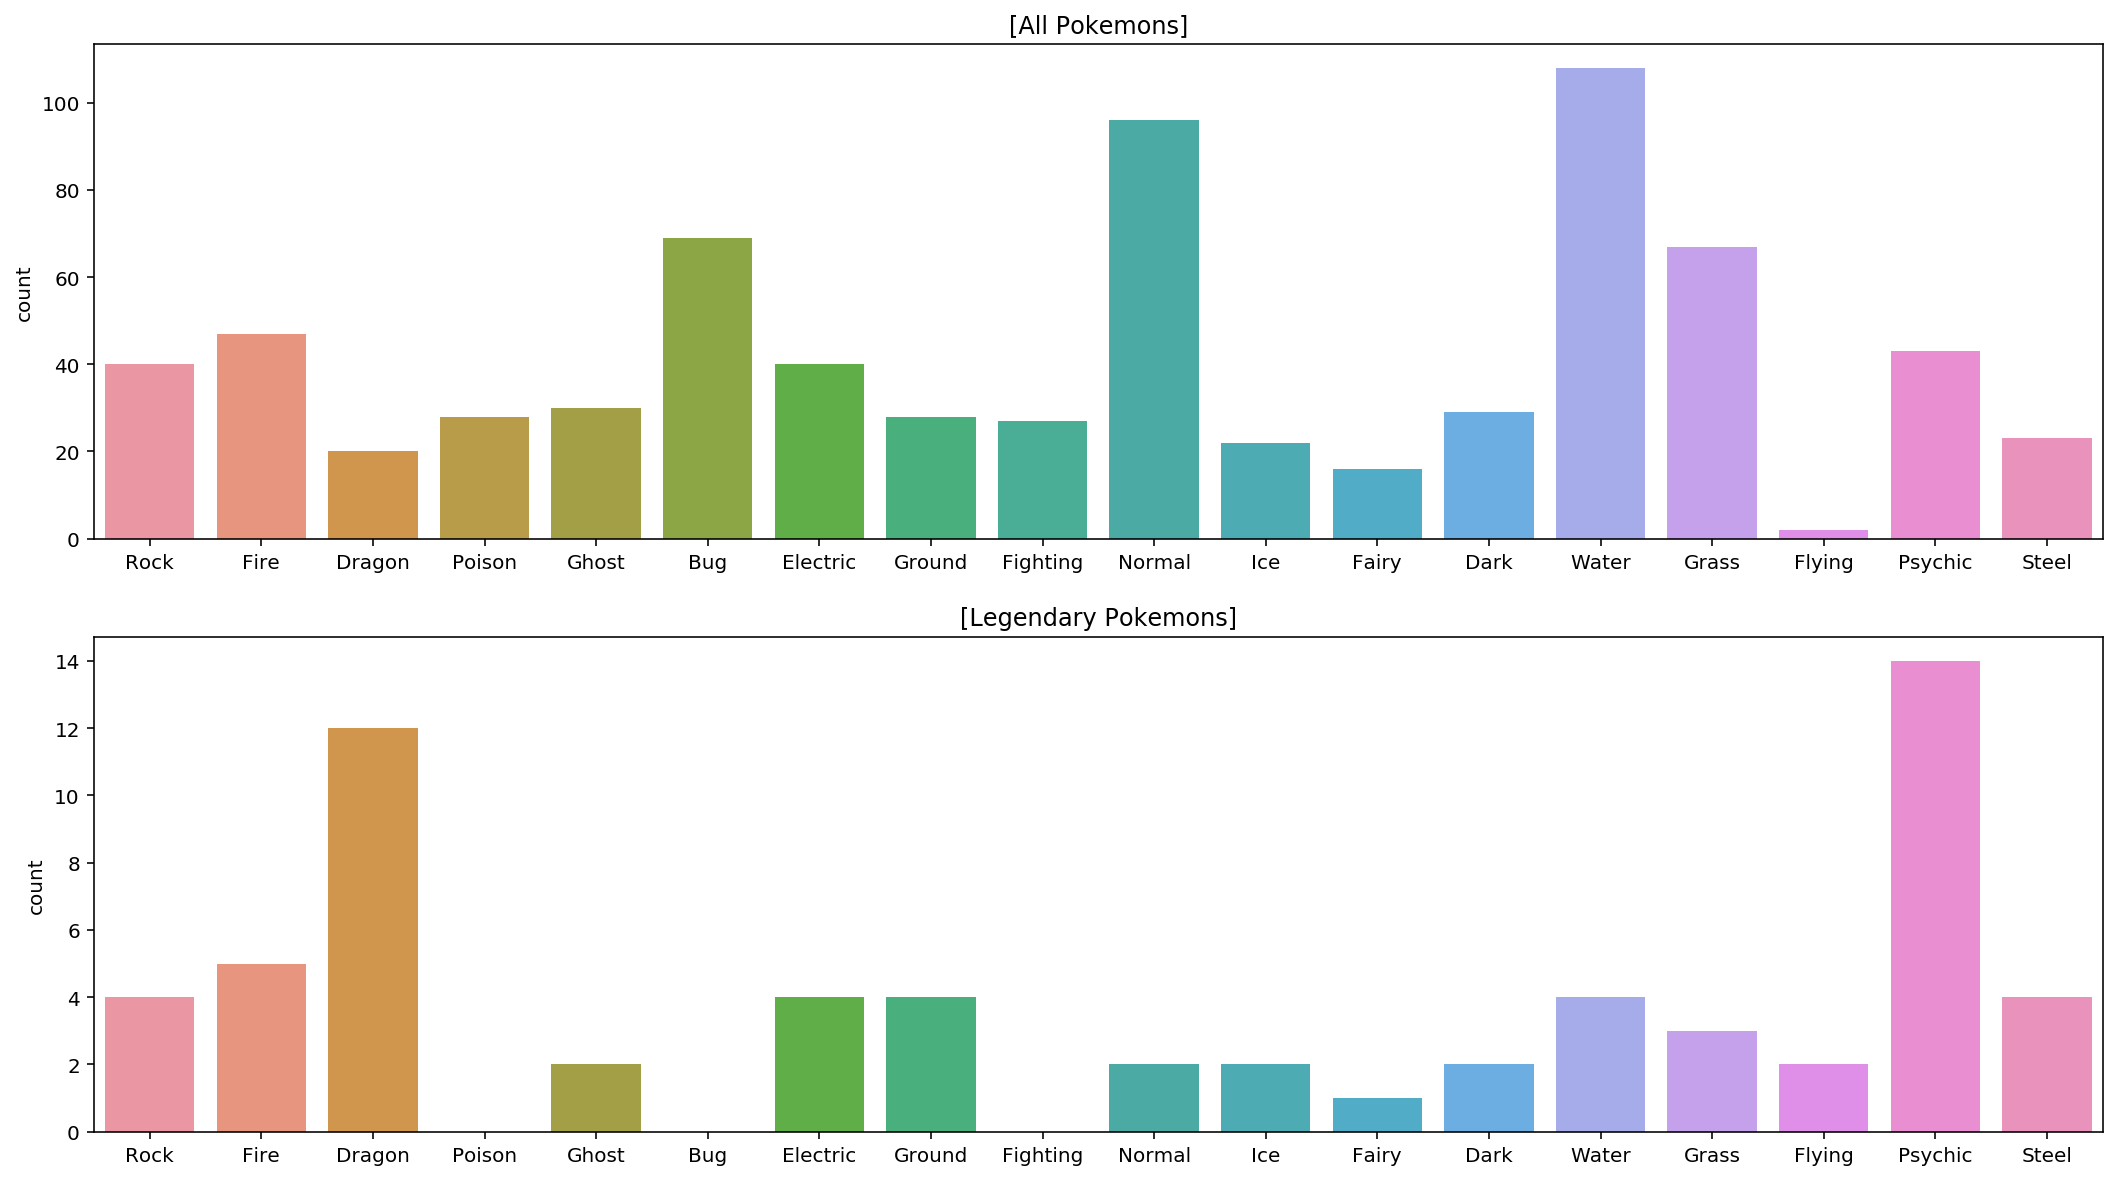

In [46]:
##sns(seaborn)의 countplot을 활용하겠습니다.
#countplot은 말 그대로 데이터의 개수를 표시하는 플롯입니다.
plt.figure(figsize=(18, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[All Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [47]:
# Type1별로 Legendary 의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


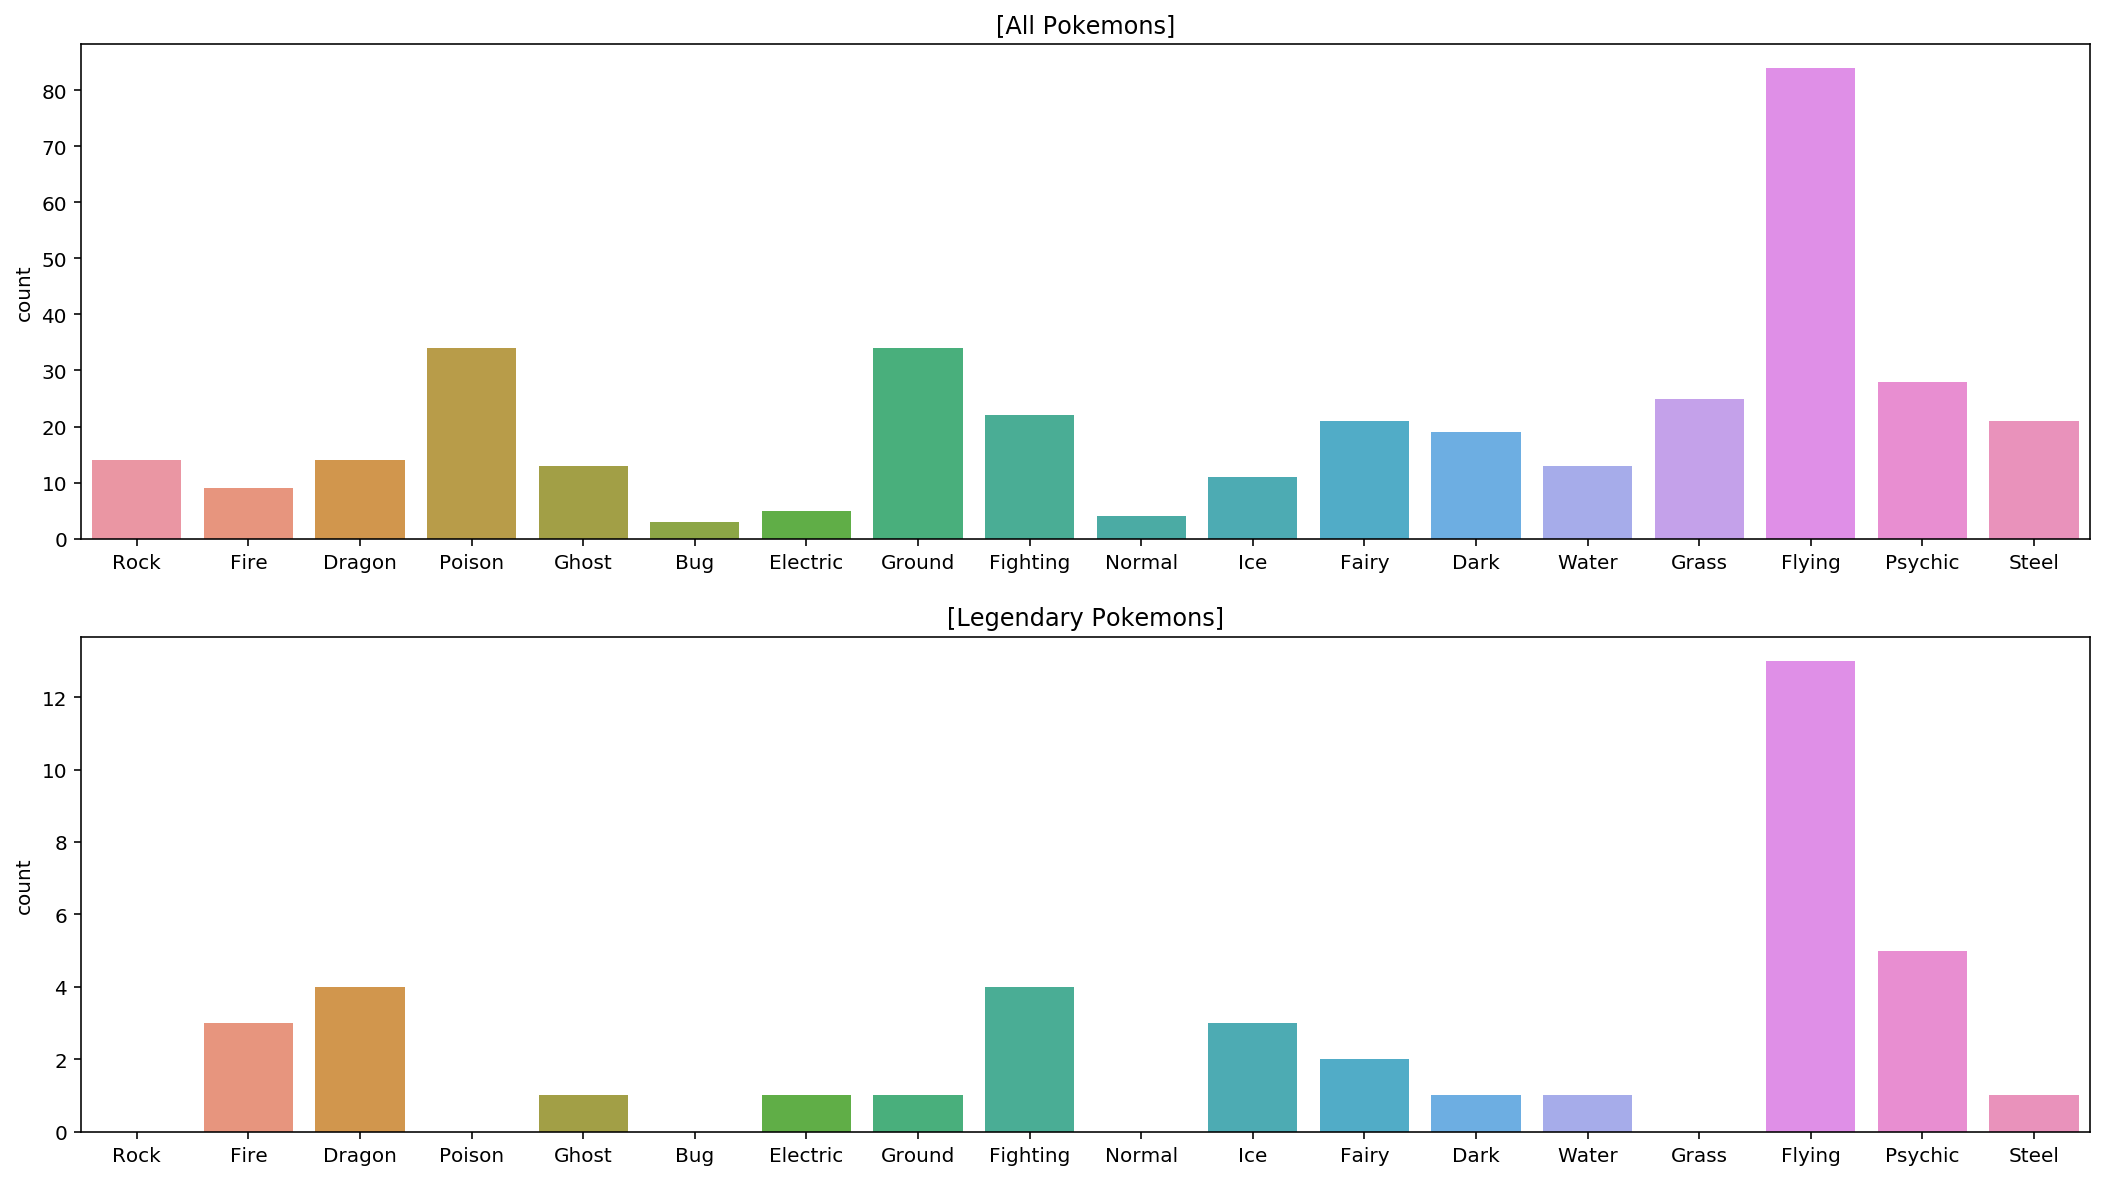

In [48]:
plt.figure(figsize=(18, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[All Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [49]:
# Type2별로 Legendary 의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429
